# Deep Learning for Predicting SIRD model parameters

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display
import time
import os
from IPython.display import clear_output

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [3]:
tf.random.set_seed(1234)

## 1. Data Analysis

In [4]:
# Reading csv with all features and target values
df = pd.read_csv("Final_Smooth_Alternative_Features_Spain.csv")

In [5]:
df.head()

,Country/Region,Date,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
0,Spain,2020-03-21,2711.857143,168.571429,0.395,-0.528571,2826.142857,279.000000,0.193532,0.042238,0.014040
1,Spain,2020-03-22,2995.714286,211.857143,0.406,-0.545714,3106.571429,309.428571,0.190061,0.032033,0.015943
2,Spain,2020-03-23,3599.142857,281.285714,0.416,-0.555476,3509.571429,342.428571,0.186409,0.021829,0.015299
3,Spain,2020-03-24,4019.571429,325.000000,0.427,-0.563095,3920.285714,379.714286,0.181782,0.011625,0.017520
4,Spain,2020-03-25,5086.428571,432.000000,0.433,-0.570714,4222.285714,401.857143,0.173246,0.001421,0.017607


In [6]:
df.tail()

,Country/Region,Date,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
723,Spain,2022-03-14,12507.000000,80.142857,0.173,-0.062619,318.142857,19.142857,0.068976,0.077341,0.000311
724,Spain,2022-03-15,14352.285714,79.571429,0.174,-0.069048,320.857143,18.285714,0.070035,0.077100,0.000243
725,Spain,2022-03-16,11218.571429,60.571429,0.176,-0.075476,324.857143,16.857143,0.077156,0.078181,0.000197
726,Spain,2022-03-17,7987.857143,48.428571,0.177,-0.080476,328.285714,17.428571,0.090718,0.079748,0.000391
727,Spain,2022-03-18,14380.428571,81.142857,0.178,-0.076190,333.857143,15.714286,0.093870,0.081923,0.000391


In [7]:
df.shape

(728, 11)

In [8]:
# Checking for no null values
df.isnull().values.any()

False

In [9]:
# Description of the dataframe
df.describe()

,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,15557.764717,141.079474,0.111666,-0.109044,680.044152,65.338305,0.083144,0.067927,0.002118
std,25178.961540,154.240247,0.088658,0.152279,688.279005,63.579917,0.025321,0.024817,0.004744
min,253.571429,0.000000,0.015000,-0.606190,31.142857,2.571429,0.038871,0.000573,0.000000
25%,3592.964286,31.714286,0.051000,-0.155595,225.071429,19.964286,0.065003,0.051538,0.000326
50%,7687.214286,93.142857,0.085000,-0.073690,523.000000,57.214286,0.078661,0.069257,0.000801
75%,15999.321429,185.571429,0.137250,-0.016429,826.500000,84.464286,0.095254,0.085458,0.001323
max,144008.857143,865.714286,0.434000,0.091429,4590.714286,421.857143,0.193532,0.142449,0.037187


In [10]:
df.corr()

,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
Daily Confirmed Smooth,1.000000,0.056163,0.752591,0.084741,0.350322,0.234948,0.108194,-0.222121,-0.187443
Daily Deaths Smooth,0.056163,1.000000,0.398774,-0.755240,0.701427,0.653896,-0.265599,-0.296331,0.371916
Positive Test Rate Smooth,0.752591,0.398774,1.000000,-0.264946,0.740638,0.617439,0.287647,-0.355434,0.039396
Mobility Rate Smooth,0.084741,-0.755240,-0.264946,1.000000,-0.546479,-0.491043,0.070637,0.332849,-0.527138
Num Hospitalizations Smooth,0.350322,0.701427,0.740638,-0.546479,1.000000,0.971878,0.166225,-0.207917,0.194803
Num UCI Smooth,0.234948,0.653896,0.617439,-0.491043,0.971878,1.000000,0.168779,-0.127670,0.167615
Beta Smooth,0.108194,-0.265599,0.287647,0.070637,0.166225,0.168779,1.000000,0.223547,0.034889
Gamma Smooth,-0.222121,-0.296331,-0.355434,0.332849,-0.207917,-0.127670,0.223547,1.000000,-0.026215
Mu Smooth,-0.187443,0.371916,0.039396,-0.527138,0.194803,0.167615,0.034889,-0.026215,1.000000


In [11]:
labels = ['Daily Confirmed Smooth', 'Daily Deaths Smooth', 'Positive Test Rate Smooth', 'Mobility Rate Smooth',
          'Num Hospitalizations Smooth', 'Num UCI Smooth', 'Beta Smooth', 'Gamma Smooth', 'Mu Smooth']

## 2. Data Preprocessing

In [12]:
# Obtaining data values
Inf = df["Daily Confirmed Smooth"].values
Deaths = df["Daily Deaths Smooth"].values
Test = df["Positive Test Rate Smooth"].values
Mobility = df["Mobility Rate Smooth"].values
Hosp = df["Num Hospitalizations Smooth"].values
UCI = df["Num UCI Smooth"].values
date = df["Date"].values

print(Inf[0], Deaths[0], Test[0], Mobility[0], Hosp[0], UCI[0], date[0])
Inf.shape, Deaths.shape, Test.shape, Mobility.shape, Hosp.shape, UCI.shape, date.shape

2711.8571428571427 168.57142857142858 0.395 -0.5285714285714286 2826.1428571428573 279.0 2020-03-21


((728,), (728,), (728,), (728,), (728,), (728,), (728,))

In [13]:
# Obtaining target values
mu = df["Mu Smooth"].values
beta = df["Beta Smooth"].values
gamma = df["Gamma Smooth"].values

print(mu[0], beta[0], gamma[0])
mu.shape, beta.shape, gamma.shape

0.0140397953403922 0.1935317998669637 0.0422375080523535


((728,), (728,), (728,))

**Merging features values and target values in separate arrays:**

In [14]:
# X_total array
columns = 6
X_total = np.empty((len(Inf), columns))

for i in range(len(X_total)):
    X_total[i] = [Inf[i], Deaths[i], Test[i], Mobility[i], Hosp[i], UCI[i]]

X_total.shape, X_total[0:5]

((728, 6),
 array([[ 2.71185714e+03,  1.68571429e+02,  3.95000000e-01,
         -5.28571429e-01,  2.82614286e+03,  2.79000000e+02],
        [ 2.99571429e+03,  2.11857143e+02,  4.06000000e-01,
         -5.45714286e-01,  3.10657143e+03,  3.09428571e+02],
        [ 3.59914286e+03,  2.81285714e+02,  4.16000000e-01,
         -5.55476190e-01,  3.50957143e+03,  3.42428571e+02],
        [ 4.01957143e+03,  3.25000000e+02,  4.27000000e-01,
         -5.63095238e-01,  3.92028571e+03,  3.79714286e+02],
        [ 5.08642857e+03,  4.32000000e+02,  4.33000000e-01,
         -5.70714286e-01,  4.22228571e+03,  4.01857143e+02]]))

In [15]:
# y_total array
columns = 3
y_total = np.empty((len(mu), columns))

for i in range(len(y_total)):
    y_total[i] = [beta[i], gamma[i], mu[i]]

y_total.shape, y_total[0:5]

((728, 3),
 array([[0.1935318 , 0.04223751, 0.0140398 ],
        [0.19006098, 0.03203343, 0.01594338],
        [0.18640881, 0.02182934, 0.01529925],
        [0.18178154, 0.01162526, 0.01751999],
        [0.1732455 , 0.00142118, 0.01760706]]))

**Subset of total data:**

In [16]:
# Introduce the total number of data to use
# ni = int(input("Introduce the initial number you want to start your deep learning process\n"))
ni = 0
print("Initial day is assumed 0. You only need to introduce the number of total data to use.\n")
nd = int(input("Introduce the total number of data to use for the deep learning process. Notice that the data will be "
           "splitted into train and test.\n"))

# Subset of total data
X_deep = X_total[ni:ni+nd]
y_deep = y_total[ni:ni+nd]
date_deep = date[ni:ni+nd]

print(X_deep[-1], y_deep[-1], date_deep[-1])
X_deep.shape, y_deep.shape, date_deep.shape

Initial day is assumed 0. You only need to introduce the number of total data to use.

Introduce the total number of data to use for the deep learning process. Notice that the data will be splitted into train and test.
600
[ 2.75171429e+03  2.21428571e+01  3.70000000e-02 -1.80952381e-02
  1.58428571e+02  1.92857143e+01] [0.11218209 0.09414399 0.0008645 ] 2021-11-10


((600, 6), (600, 3), (600,))

In [17]:
# Selecting only the beta parameter as the unic target value
y_deep_mu = np.empty((len(y_deep), 1))

for i in range(len(y_deep)):
    y_deep_mu[i] = y_deep[i][2]

y_deep_mu.shape, y_deep_mu[0:10]

((600, 1),
 array([[0.0140398 ],
        [0.01594338],
        [0.01529925],
        [0.01751999],
        [0.01760706],
        [0.01796094],
        [0.01763418],
        [0.01714265],
        [0.0162016 ],
        [0.01548019]]))

**Cut time series data into sequences:**

In [18]:
# Definition of the time step

time_steps = int(input("Introduce the length of the temporal series\n"))
possible_time_steps = time_steps

X_deep_series = np.empty((len(X_deep) - time_steps, time_steps, 6))
y_deep_mu_series = np.empty(((len(y_deep_mu) - time_steps, 1)))

# Creation of the sequential X and y data
for i in range(0, len(X_deep) - time_steps, 1):
    X_deep_series[i] = X_deep[i:(i+time_steps)]
    y_deep_mu_series[i] = y_deep_mu[(i+time_steps)-1]
    
len(X_deep_series), len(y_deep_mu_series), X_deep_series[0].shape, y_deep_mu_series[0].shape

Introduce the length of the temporal series
7


(593, 593, (7, 6), (1,))

**Cross-validation generator:**

In [19]:
# GroupShuffleSplit definition for cross-validation
from sklearn.model_selection import GroupShuffleSplit

groups = np.arange(len(X_deep_series))
splits = 5
gss = GroupShuffleSplit(n_splits=splits, train_size=.8, random_state=42)

**Standardization of datasets:**

In [20]:
def standarize(X_train, X_test, y_train_mu, y_test_mu):

    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
    # StandardScaler: Standardize features by removing the mean and scaling to unit variance
    from sklearn.preprocessing import StandardScaler

    # Definition of two scaler objects: one for the features and another for the targets
    feature_scaler = StandardScaler()
    target_scaler = StandardScaler()

    # Fit and transform of the objects from the train data
    X_train_S = feature_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    y_train_mu_S = target_scaler.fit_transform(y_train_mu)

    # # Transform of the train data
    # X_train_S = feature_scaler.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    # y_train_mu_S = target_scaler.transform(y_train_mu.reshape(-1, X_train.shape[-1])).reshape(y_train_mu.shape)

    # Transform of the test data
    X_test_S = feature_scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    y_test_mu_S = target_scaler.transform(y_test_mu)
    
    return(feature_scaler, target_scaler, X_train_S, y_train_mu_S, X_test_S, y_test_mu_S)

## 3. Deep Learning Sequential Model Definition

In [21]:
# Neuron parameters
neu = (128, 64)

In [22]:
# Dropout percentage parameter
dropout_perc = [0.5]

In [23]:
# Activation functions parameters
act = ('relu', 'relu')

In [24]:
# Loss function parameter
loss = 'mse'

In [25]:
# Function for creating the DL sequential model
def dl_model(train_data, y_train, test_data, y_test, neuron, act_fun, drop_perc, loss_fun):
    from keras.layers import Dense, LSTM, Dropout
    
    model = keras.Sequential()
    model.add(LSTM(neuron[0], activation=act_fun[0], return_sequences=True, input_shape=train_data.shape[1:]))
    model.add(Dropout(drop_perc))
    model.add(LSTM(neuron[1], activation=act_fun[1], return_sequences=False))
    model.add(Dropout(drop_perc))
    model.add(Dense(units=1, activation='linear'))
    
    # opt = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5)
    model.compile(optimizer='adam', loss=loss_fun, metrics=[loss_fun])
    
    return(model)

In [26]:
# Bi LSTM 
def BiLstm(train_data, y_train, test_data, y_test, neuron, act_fun, drop_perc):
    tf.random.set_seed(1234)
    from keras.layers import Dense, LSTM, Dropout, Bidirectional
    
    model = keras.Sequential()
    model.add(Bidirectional(LSTM(neuron[0], activation = act_fun[0], return_sequences=True), input_shape = train_data.shape[1:]))
    model.add(Dropout(drop_perc))
    model.add(Bidirectional(LSTM(neuron[1], activation = act_fun[1]), input_shape = train_data.shape[1:]))
    model.add(Dense(train_data.shape[1]))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    history = model.fit(train_data, y_train, epochs = 5000, verbose = 0, validation_data = (test_data, y_test))
    
    return (model, history)

In [27]:
# Function to train the model
def error_pred(model, history, X_train_S, y_train_mu_S, X_test_S, y_test_mu_S):

    # Testing data prediction
    y_pred = model(X_test_S)
    
    # Errors array
    error_square = np.empty(len(y_pred), dtype=float)
    for i in range(len(y_pred)):
        error_square[i] = (y_pred[i] - y_test_mu_S[i])**2
    
    # MSE and RMSE value
    MSE = np.mean(error_square)
    RMSE = np.sqrt(MSE)
    
    # STD and VAR value
    STD = np.std(error_square)
    VAR = np.var(error_square)
    
    return (MSE, RMSE, STD, VAR)

In [28]:
# Function to plot the loss for every epoch
def plot_loss(history, combination):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    # Summarize history for loss
    plt.plot(history.history['loss'], label = 'train', color = 'blue')
    plt.plot(history.history['val_loss'], label = 'test', color = 'orange')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    # Saving plot
    name_file = 'BiLstm_alt_loss_' + combination + '.png' 
    plt.savefig(name_file, format='png', dpi=300, facecolor='white')
    
    plt.show()

In [29]:
# Function to plot the train prediction
def plot_train(y_train_real, y_train_pred, combination):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    # plt.plot(y_train_real, '--', label = 'Real', color = 'blue')
    plt.plot(y_train_real, '.', markersize = 2.5, label = 'Real', color = 'blue')
    # plt.plot(y_train_pred, '--', label = 'Pred', color = 'orange')
    plt.plot(y_train_pred, '.', markersize = 2.5, label = 'Pred', color = 'orange')
    plt.title('Y train')
    plt.legend(loc='best')
    
    # Saving plot
    name_file = 'BiLstm_alt_train_' + combination + '.png' 
    plt.savefig(name_file, format='png', dpi=300, facecolor='white')
    
    plt.show()

In [30]:
# Function to plot the test prediction
def plot_test(y_test_real, y_test_pred, combination):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    # plt.plot(y_test_real, '--', label = 'Real', color = 'blue')
    plt.plot(y_test_real, '.', markersize = 2.5, label = 'Real', color = 'blue')
    # plt.plot(y_test_pred, '--', label = 'Pred', color = 'orange')
    plt.plot(y_test_pred, '.', markersize = 2.5, label = 'Pred', color = 'orange')
    plt.title('Y test')
    plt.legend(loc='best')
    
    # Saving plot
    name_file = 'BiLstm_alt_test_' + combination + '.png' 
    plt.savefig(name_file, format='png', dpi=300, facecolor='white')
    
    plt.show()

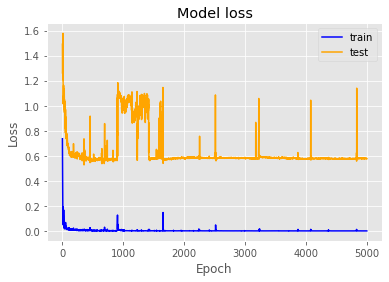

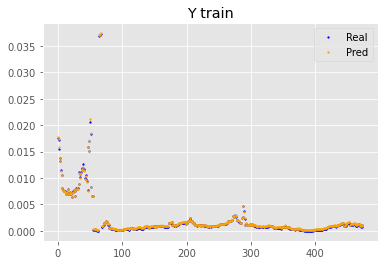

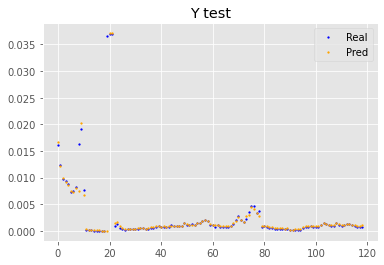

Cross validation round 1 completed!


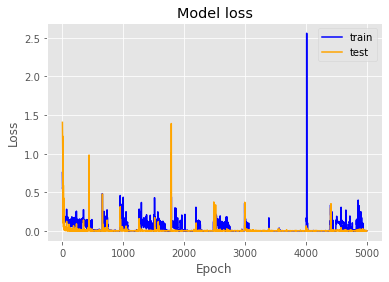

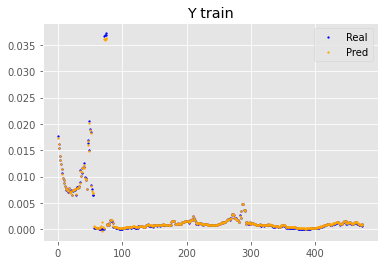

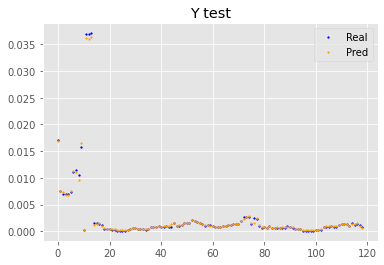

Cross validation round 2 completed!


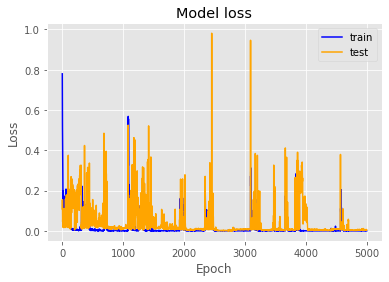

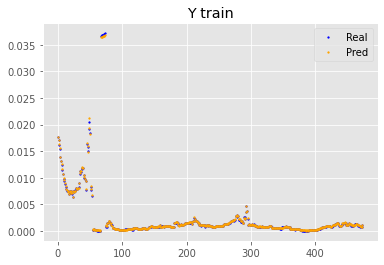

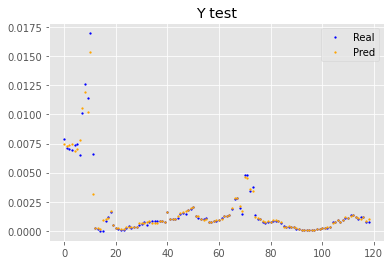

Cross validation round 3 completed!


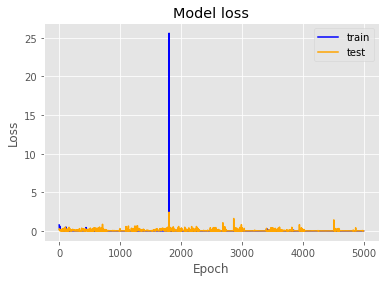

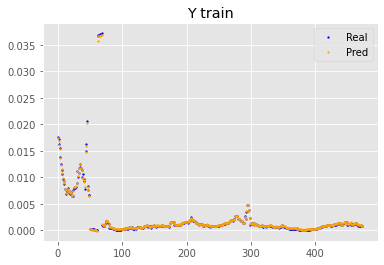

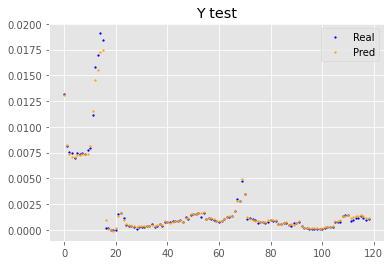

Cross validation round 4 completed!


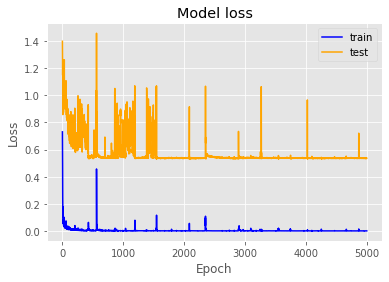

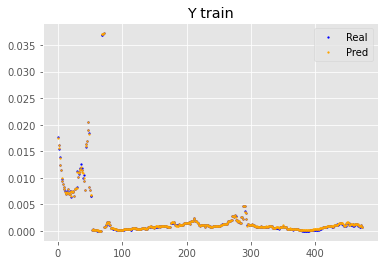

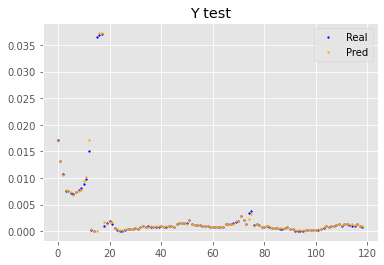

Cross validation round 5 completed!


In [31]:
for drop_perc in dropout_perc:
    
    scores_MSE = np.empty(splits, dtype=float)
    scores_RMSE = np.empty(splits, dtype=float)
    scores_STD = np.empty(splits, dtype=float)
    scores_VAR = np.empty(splits, dtype=float)
    idx = 0
    
    # Train-Test split with the cross-validator generator (5 splits)
    for train_idx, test_idx in gss.split(X_deep_series, y_deep_mu_series, groups):

        # Remove previous models
        if 'model' in locals():
            del(model)

        # Train set
        X_train = X_deep_series[train_idx]
        y_train_mu = y_deep_mu_series[train_idx]

        # Test set
        X_test = X_deep_series[test_idx]
        y_test_mu = y_deep_mu_series[test_idx]

        # Standarization
        feature_scaler, target_scaler, X_train_S, y_train_mu_S, X_test_S, y_test_mu_S = standarize(X_train, X_test, 
                                                                                                       y_train_mu, y_test_mu)

        # Method parameters summary
        combination = ('mu_tstep_' + str(X_train.shape[1]) + '-neu_' + str(neu) + '-drop_' +  str(drop_perc) + '-act_' + 
                       str(act) + '-loss_' + str(loss) + '-crossval')

        # Running DL model
        model, history = BiLstm(X_train_S, y_train_mu_S, X_test_S, y_test_mu_S, neu, act, drop_perc)
        MSE, RMSE, STD, VAR = error_pred(model, history, X_train_S, y_train_mu_S, X_test_S, y_test_mu_S)

        # Adding MSE and RMSE mean value of the DL model prediction
        scores_MSE[idx] = MSE
        scores_RMSE[idx] = RMSE
        scores_STD[idx] = STD
        scores_VAR[idx] = VAR
        idx += 1

        # Train Prediction
        y_train_mu_pred = model.predict(X_train_S)
        y_train_mu_pred_inv = target_scaler.inverse_transform(y_train_mu_pred)
        
        # Test Prediction
        y_pred = model.predict(X_test_S)
        y_pred_inv = target_scaler.inverse_transform(y_pred)
        
        # Official data rescale
        y_train_mu_series_inv = target_scaler.inverse_transform(y_train_mu_S)
        y_test_mu_series_inv = target_scaler.inverse_transform(y_test_mu_S)
        
        # Plots
        short_comb = 'mu_neu_' + str(neu) + '-drop_' + str(drop_perc) + '-act_' + str(act)
        plot_loss(history, short_comb)
        plot_train(y_train_mu_series_inv, y_train_mu_pred_inv, short_comb)
        plot_test(y_test_mu_series_inv, y_pred_inv, short_comb)
        
        # Print when an iteration has ended
        print("Cross validation round {} completed!".format(idx))
    
    # Saving MSE and RMSE data in file text for every combination
    file_name = combination + '.txt'
    file = open(file_name, "w+")

    file.write('MSE' + '\t' + 'RMSE' + '\t' + 'STD' + '\t' + 'VAR' +  '\n')
    for MSE_val, RMSE_val, STD_val, VAR_val in zip(scores_MSE, scores_RMSE, scores_STD, scores_VAR):
        line = str(MSE_val) + '\t' + str(RMSE_val) + '\t' + str(STD_val) + '\t' + str(VAR_val)
        file.write(line + '\n')
    file.write('\n' + 'Mean MSE' + '\t' + 'Mean RMSE' + '\t' + 'Mean STD' + '\t' + 'Mean VAR' + '\n')
    file.write(str(np.mean(scores_MSE)) + '\t' + str(np.mean(scores_RMSE)) + '\t' + str(np.mean(scores_STD)) + '\t' + str(np.mean(scores_VAR)))
    
    file.close()
    clear_output(wait=True)

In [32]:
train_idx, test_idx

(array([  0,   2,   3,   4,   6,   7,   9,  10,  11,  12,  13,  16,  17,
         18,  19,  20,  21,  22,  23,  24,  27,  28,  29,  31,  33,  34,
         36,  37,  38,  39,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,
         65,  66,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  79,
         80,  81,  82,  85,  86,  87,  89,  91,  92,  93,  94,  96,  98,
         99, 100, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113,
        115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 127, 128, 129,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159,
        160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 175,
        176, 177, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190,
        191, 195, 199, 201, 202, 203, 205, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 218, 219, 220, 221, 222, 223